## Hanna Anenia
## 10/27/2024
## Capstone Project 1

In [10]:
import pandas as pd

# Step 1: Read the dataset
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Step 2: Display the first 10 instances
first_10_instances = df.head(10)
print(first_10_instances)

  Employee_ID  Age             Gender           Job_Role       Industry  \
0     EMP0001   32         Non-binary                 HR     Healthcare   
1     EMP0002   40             Female     Data Scientist             IT   
2     EMP0003   59         Non-binary  Software Engineer      Education   
3     EMP0004   27               Male  Software Engineer        Finance   
4     EMP0005   49               Male              Sales     Consulting   
5     EMP0006   59         Non-binary              Sales             IT   
6     EMP0007   31  Prefer not to say              Sales             IT   
7     EMP0008   42         Non-binary     Data Scientist  Manufacturing   
8     EMP0009   56  Prefer not to say     Data Scientist     Healthcare   
9     EMP0010   30             Female                 HR             IT   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote            

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


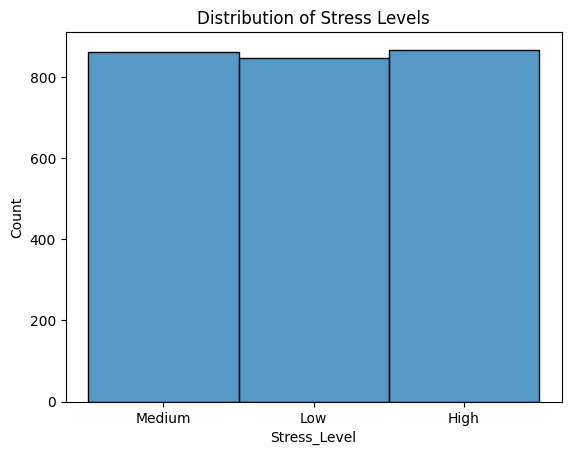

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Load Data"Impact_of_Remote_Work_on_Mental_Health.csv"
data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Step 2: Data Cleaning
data.dropna(inplace=True)
print(data.columns)

# Step 3: Exploratory Data Analysis (EDA)
sns.histplot(data['Stress_Level'])
plt.title("Distribution of Stress Levels")
plt.show()







In [ ]:
#Step 4: Feature Engineering
# Create a new feature (example: Stress Index)
data['Stress_Index'] = data['Stress_Level'] * data['Hours_Worked_Per_Week']

# Step 5: Data Modeling (Example: Linear Regression)
X = data[['Hours_Worked_Per_Week', 'Stress_Index']]
y = data['Mental_Health_Condition']

print(X.apply(lambda col: col.unique()))
X = pd.get_dummies(X)  # for one-hot encoding all categorical columns
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')











NameError: name 'data' is not defined

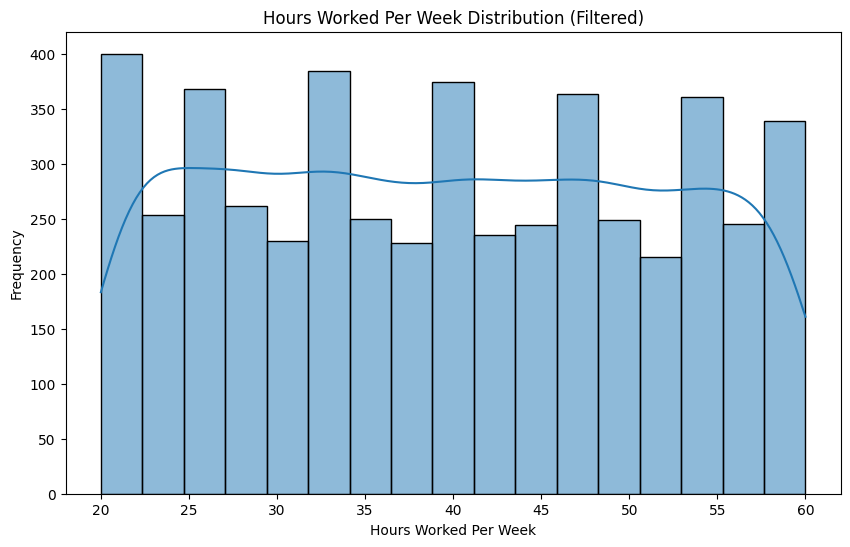

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")  # Replace 'Path_to_Your_File.csv' with the actual file path

# Remove extreme outliers by filtering to hours less than 80 per week
filtered_df = df[df['Hours_Worked_Per_Week'] < 80]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Hours_Worked_Per_Week'], kde=True)
plt.title("Hours Worked Per Week Distribution (Filtered)")
plt.xlabel("Hours Worked Per Week")
plt.ylabel("Frequency")
plt.show()

In [14]:
import pandas as pd

# Load the data
file_path = '/path/to/Impact_of_Remote_Work_on_Mental_Health.csv'
data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Calculate the distribution of job roles
job_role_distribution = data['Job_Role'].value_counts()

# Display the distribution
print(job_role_distribution)


Job_Role
Project Manager      738
Sales                733
Designer             723
HR                   716
Software Engineer    711
Data Scientist       696
Marketing            683
Name: count, dtype: int64


In [25]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


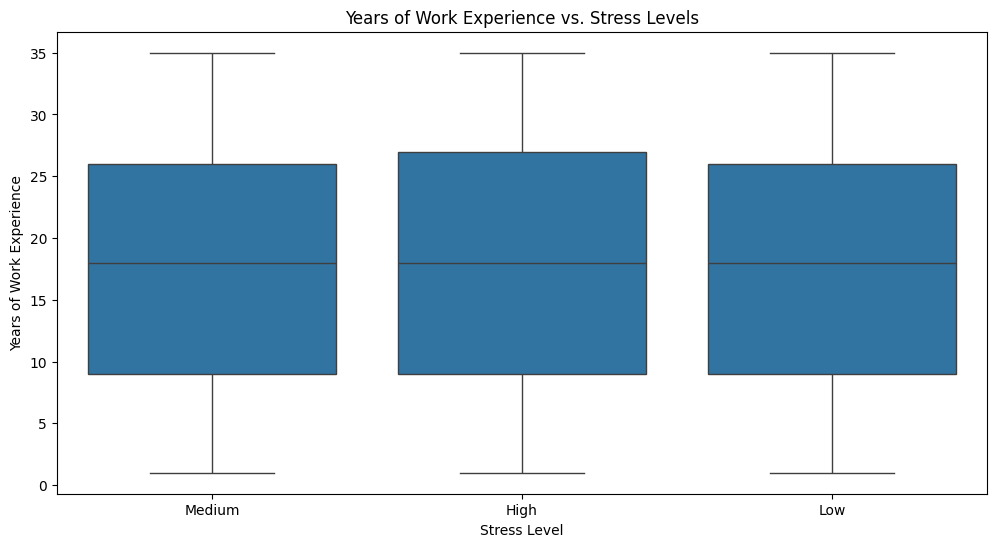

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stress_Level', y='Years_of_Experience', data=data)
plt.title("Years of Work Experience vs. Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Years of Work Experience")
plt.show()

In [52]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Step 1: Load the data
data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Step 2: Print the first few rows and column names to find the correct region column
print("Data Preview:")
print(data.head())
print("Column Names:")
print(data.columns)

# Step 3: Clean column names (remove any extra whitespace)
data.columns = data.columns.str.strip()

# Check again for 'region' column or its equivalent
if 'region' in data.columns:
    print("Region column found.")
else:
    print("No 'region' column found. Available columns:")
    print(data.columns)

# Example region to coordinates mapping
region_coords = {
    'Region A': (-118.25, 34.05),  # Los Angeles
    'Region B': (-115.15, 36.16),  # Las Vegas
    'Region C': (-74.00, 40.71),   # New York City
    'Region D': (-122.42, 37.77),  # San Francisco
}

# Step 4: Add coordinates to the DataFrame if the 'region' column is present
if 'region' in data.columns:
    data['longitude'] = data['region'].map(lambda x: region_coords[x][0] if x in region_coords else None)
    data['latitude'] = data['region'].map(lambda x: region_coords[x][1] if x in region_coords else None)

    # Step 5: Create GeoDataFrame
    geometry = [Point(xy) for xy in zip(data.longitude, data.latitude)]
    gdf = gpd.GeoDataFrame(data, geometry=geometry)

    # Continue with the mapping code...
    gdf.set_crs(epsg=4326, inplace=True)  # Set to WGS84
    gdf = gdf.dropna(subset=['longitude', 'latitude', 'stress_level', 'mental_health_level'])

    # Create a base map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(figsize=(15, 10), color='white', edgecolor='black')

    # Plot stress levels
    gdf.plot(ax=ax, 
             marker='o', 
             color='red', 
             markersize=gdf['stress_level'] * 10, 
             alpha=0.5, 
             label='Stress Level')

    # Overlay mental health levels
    gdf['mental_health_size'] = gdf['mental_health_level'] * 10  # Scale for visibility
    gdf.plot(ax=ax, 
             marker='x', 
             color='blue', 
             markersize=gdf['mental_health_size'], 
             alpha=0.7, 
             label='Mental Health Level')

    # Add a basemap
    ctx.add_basemap(ax, crs=gdf.crs.to_string())

    # Customize the plot
    plt.title('Stress and Mental Health Levels by Region')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Mapping cannot proceed as the 'region' column is missing.")


Data Preview:
  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   


In [83]:
# Get statistical summary of numerical columns
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


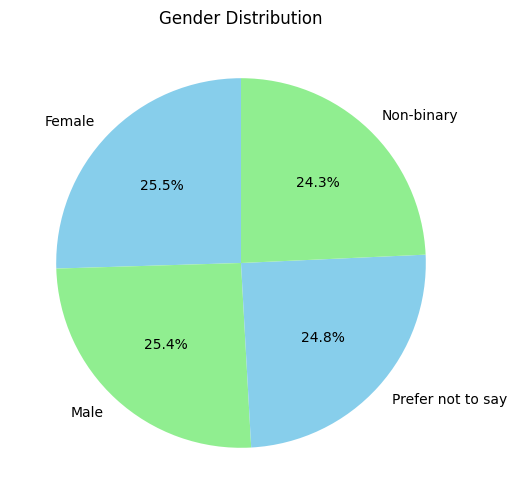

In [84]:
# Pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()


## Correlation Matrix

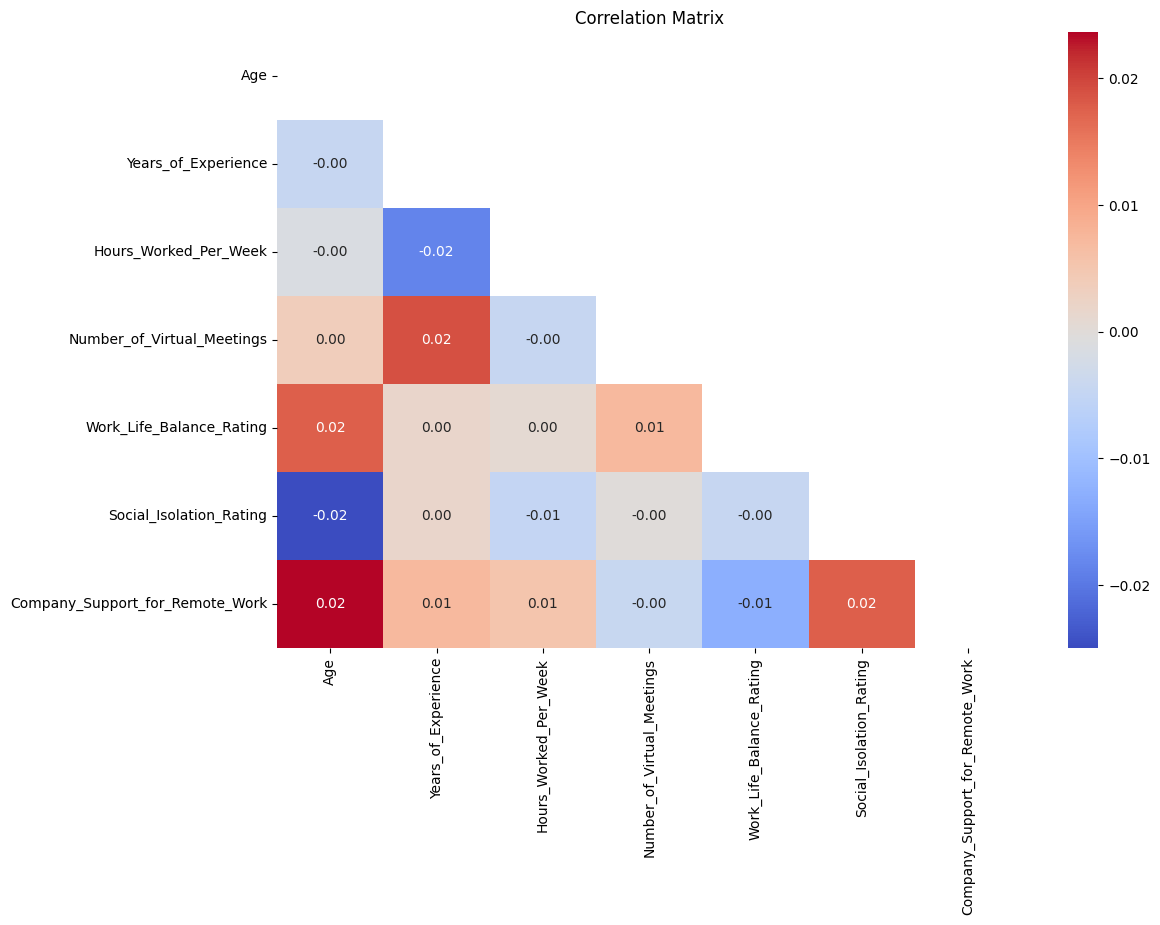

In [88]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])  
correlation_matrix = numeric_df.corr()

# Plot the heatmap with the upper triangle masked
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix')
plt.show()
